In [1]:
import pandas as pd
import matplotlib.pyplot as plt

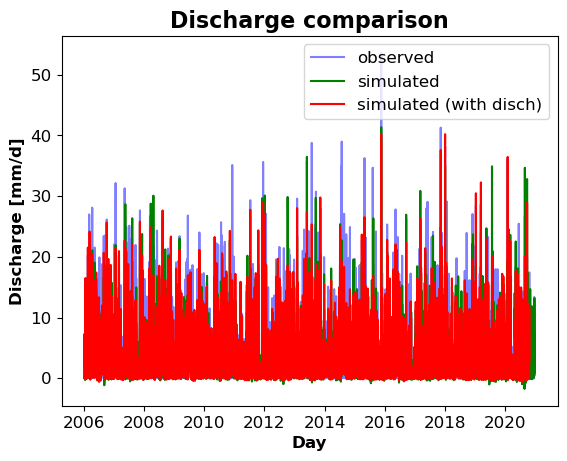

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the CSV files
y_obs = pd.read_csv('y_obs.csv', parse_dates=[0])
y_sim = pd.read_csv('y_sim.csv', parse_dates=[0])
y_sim_with_disch = pd.read_csv(r'U:\02_Software\Github\lstm_backward\results\inverse_experiment\y_sim.csv', parse_dates=[0])

# Set the first unnamed column (dates) as the index
y_obs.set_index(y_obs.columns[0], inplace=True)
y_sim.set_index(y_sim.columns[0], inplace=True)
y_sim_with_disch.set_index(y_sim_with_disch.columns[0], inplace=True)

# Extract the series for the basin to analyze
basin_to_analyze = 'GRDC_6335125'
observed = y_obs[basin_to_analyze]
simulated = y_sim[basin_to_analyze]
simulated_with_disch = y_sim_with_disch[basin_to_analyze]

# Define the color palette
color_palette = {
    "observed": "blue",
    "LSTM": "green",
    "LSTM_with_disch": "red"
}

# Plot observed and both sets of simulated discharges
plt.plot(observed, label="observed", color=color_palette["observed"], alpha=0.5)
plt.plot(simulated, label="simulated", color=color_palette["LSTM"])
plt.plot(simulated_with_disch, label="simulated (with disch)", color=color_palette["LSTM_with_disch"])

# Format plot
plt.xlabel('Day', fontsize=12, fontweight='bold')
plt.ylabel('Discharge [mm/d]', fontsize=12, fontweight='bold')
plt.title('Discharge comparison', fontsize=16, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(loc="upper right", fontsize=12)

# Save the plot (uncomment the line below to save the plot)
# save_folder = 'path_to_save_folder'
# plt.savefig(save_folder+'/Model_Comparison.png', bbox_inches='tight', pad_inches=0)

# Display the plot
plt.show()


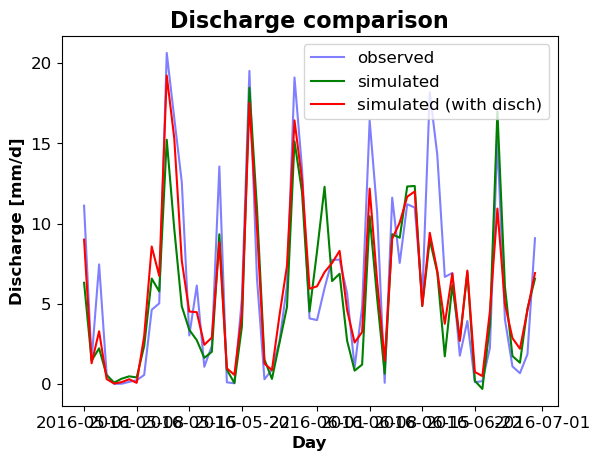

In [11]:
# Subset to date range
# Define the date range
start_date = '2016-05-01'  # Replace with your start date
end_date = '2016-06-30'    # Replace with your end date

# Subset the DataFrames to the specified date range
y_obs_subset = y_obs.loc[start_date:end_date]
y_sim_subset = y_sim.loc[start_date:end_date]
y_sim_with_disch_subset = y_sim_with_disch.loc[start_date:end_date]

# Extract the series for the basin to analyze
basin_to_analyze = 'GRDC_6335180'
observed = y_obs_subset[basin_to_analyze]
simulated = y_sim_subset[basin_to_analyze]
simulated_with_disch = y_sim_with_disch_subset[basin_to_analyze]

# Define the color palette
color_palette = {
    "observed": "blue",
    "LSTM": "green",
    "LSTM_with_disch": "red"
}

# Plot observed and both sets of simulated discharges
plt.plot(observed, label="observed", color=color_palette["observed"], alpha=0.5)
plt.plot(simulated, label="simulated", color=color_palette["LSTM"])
plt.plot(simulated_with_disch, label="simulated (with disch)", color=color_palette["LSTM_with_disch"])

# Format plot
plt.xlabel('Day', fontsize=12, fontweight='bold')
plt.ylabel('Discharge [mm/d]', fontsize=12, fontweight='bold')
plt.title('Discharge comparison', fontsize=16, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(loc="upper right", fontsize=12)

# Save the plot (uncomment the line below to save the plot)
# save_folder = 'path_to_save_folder'
# plt.savefig(save_folder+'/Model_Comparison.png', bbox_inches='tight', pad_inches=0)

# Display the plot
plt.show()